<img src="https://codesrevolvewordpress.s3.us-west-2.amazonaws.com/revolveai/2022/05/15110810/natural-language-processing-techniques.png">


# Final Report
* Wilson Velasco
* Scott Barnett

## NLP Project


NLP Project## Goals
* Construct a ML model that predicts which programming language was used
* Find key indicators of language
* Deliver a report to the data science team 
* Deliver a presentation to a general audience

### Data Dictionary

| Feature | Datatype | Key | Definition |
|---|---|---|---|
| repo | object | unique | Name of GitHub directory |
| language | object | unique | Programming language used |
| readme_contents | object | unique  | contents of the readme file  |

## Imports

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

import acquire
import wrangle
import functions

#import NLP transformers 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#import classification models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB

## Acquire

* Data scraped from GitHub from Azure organization
    * File cached to local repository
    * Data read into notebook through cached .csv
    
* Original dataframe contained 846 rows and 3 columns
* The data was aquired on 27 June 2023
* Each row represents a seperate GitHub repository
* Each column represents a feature of the repository


In [2]:
#Acquire data from cache

data = pd.read_csv('github.csv', index_col=0)

In [3]:
#Check dataset

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 846 entries, 0 to 845
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             846 non-null    object
 1   language         752 non-null    object
 2   readme_contents  846 non-null    object
dtypes: object(3)
memory usage: 26.4+ KB


In [4]:
#Sneak peek

data.head()

,repo,language,readme_contents
0,Azure/solution-center,Shell,# Azure solutions metadata repository\n \...
1,Azure/azure-docs-sdk-dotnet,Python,## Documentation for Azure .NET SDK APIs\n\n##...
2,Azure/azure-rest-api-specs,NaN,# Azure REST API Specifications\n\n## Descript...
3,Azure/AgentBaker,Go,# Agentbaker\r\n\r\n[![Coverage Status](https:...
4,Azure/bicep,Bicep,[![Build](https://github.com/Azure/bicep/actio...


## Prepare

* Prepared data
    * Took value_counts() of each language. Limited dataset to six most popular languages.
* Removed rows with nulls in language columns, since language is our target variable.
* Processed text in readme_contents to clean, tokenize, lemmatize, and remove stopwords from text.
* Found top 20 words in each language prior to split, and removed all other words.
* Split data into **train**, **validate**, **test**

In [5]:
#Clean data, process text

data = wrangle.clean_repos(data)

data.head()

,repo,language,readme_contents
1,Azure/azure-docs-sdk-dotnet,Python,net sdk repository net sdk api dotnet api dotn...
3,Azure/AgentBaker,Go,io io node template script build template api ...
6,Azure/communication-ui-library,TypeScript,io npm version io j package io io build workfl...
7,Azure/azure-linux-extensions,Python,extension code extension extension extension e...
8,Azure/azureml-assets,Python,repository version use en u en u en u use en u...


In [6]:
data.info()

#Left with 467 entries

<class 'pandas.core.frame.DataFrame'>
Int64Index: 467 entries, 1 to 845
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   repo             467 non-null    object
 1   language         467 non-null    object
 2   readme_contents  467 non-null    object
dtypes: object(3)
memory usage: 14.6+ KB


### Bring in Data for Exploration

In [7]:
# Split data

train, validate, test = wrangle.split_data(data, 'language')

train -> (261, 3), 55.89%
validate -> (112, 3),23.98%
test -> (94, 3), 20.13%


### Sneak Peak at the Data


In [8]:
train.head(3)

,repo,language,readme_contents
456,Azure/Azure-Data-Factory-Integration-Runtime-i...,PowerShell,data container sample sample data container ve...
329,Azure/azure-saas,C#,cloud build 1 2 1 2 io code run use issue en u...
61,Azure/aks-tls-bootstrap,Go,ak ak action workflow ak action workflow io ak...


## Exploration

* All features independently evaluated against wine quality
* alpha =.05 for all statistics ran
* For categorical features 'T-tests' were used


In [9]:
# visualization distribution of target 


### 1. Are there any key words that are used more often in certain languages?

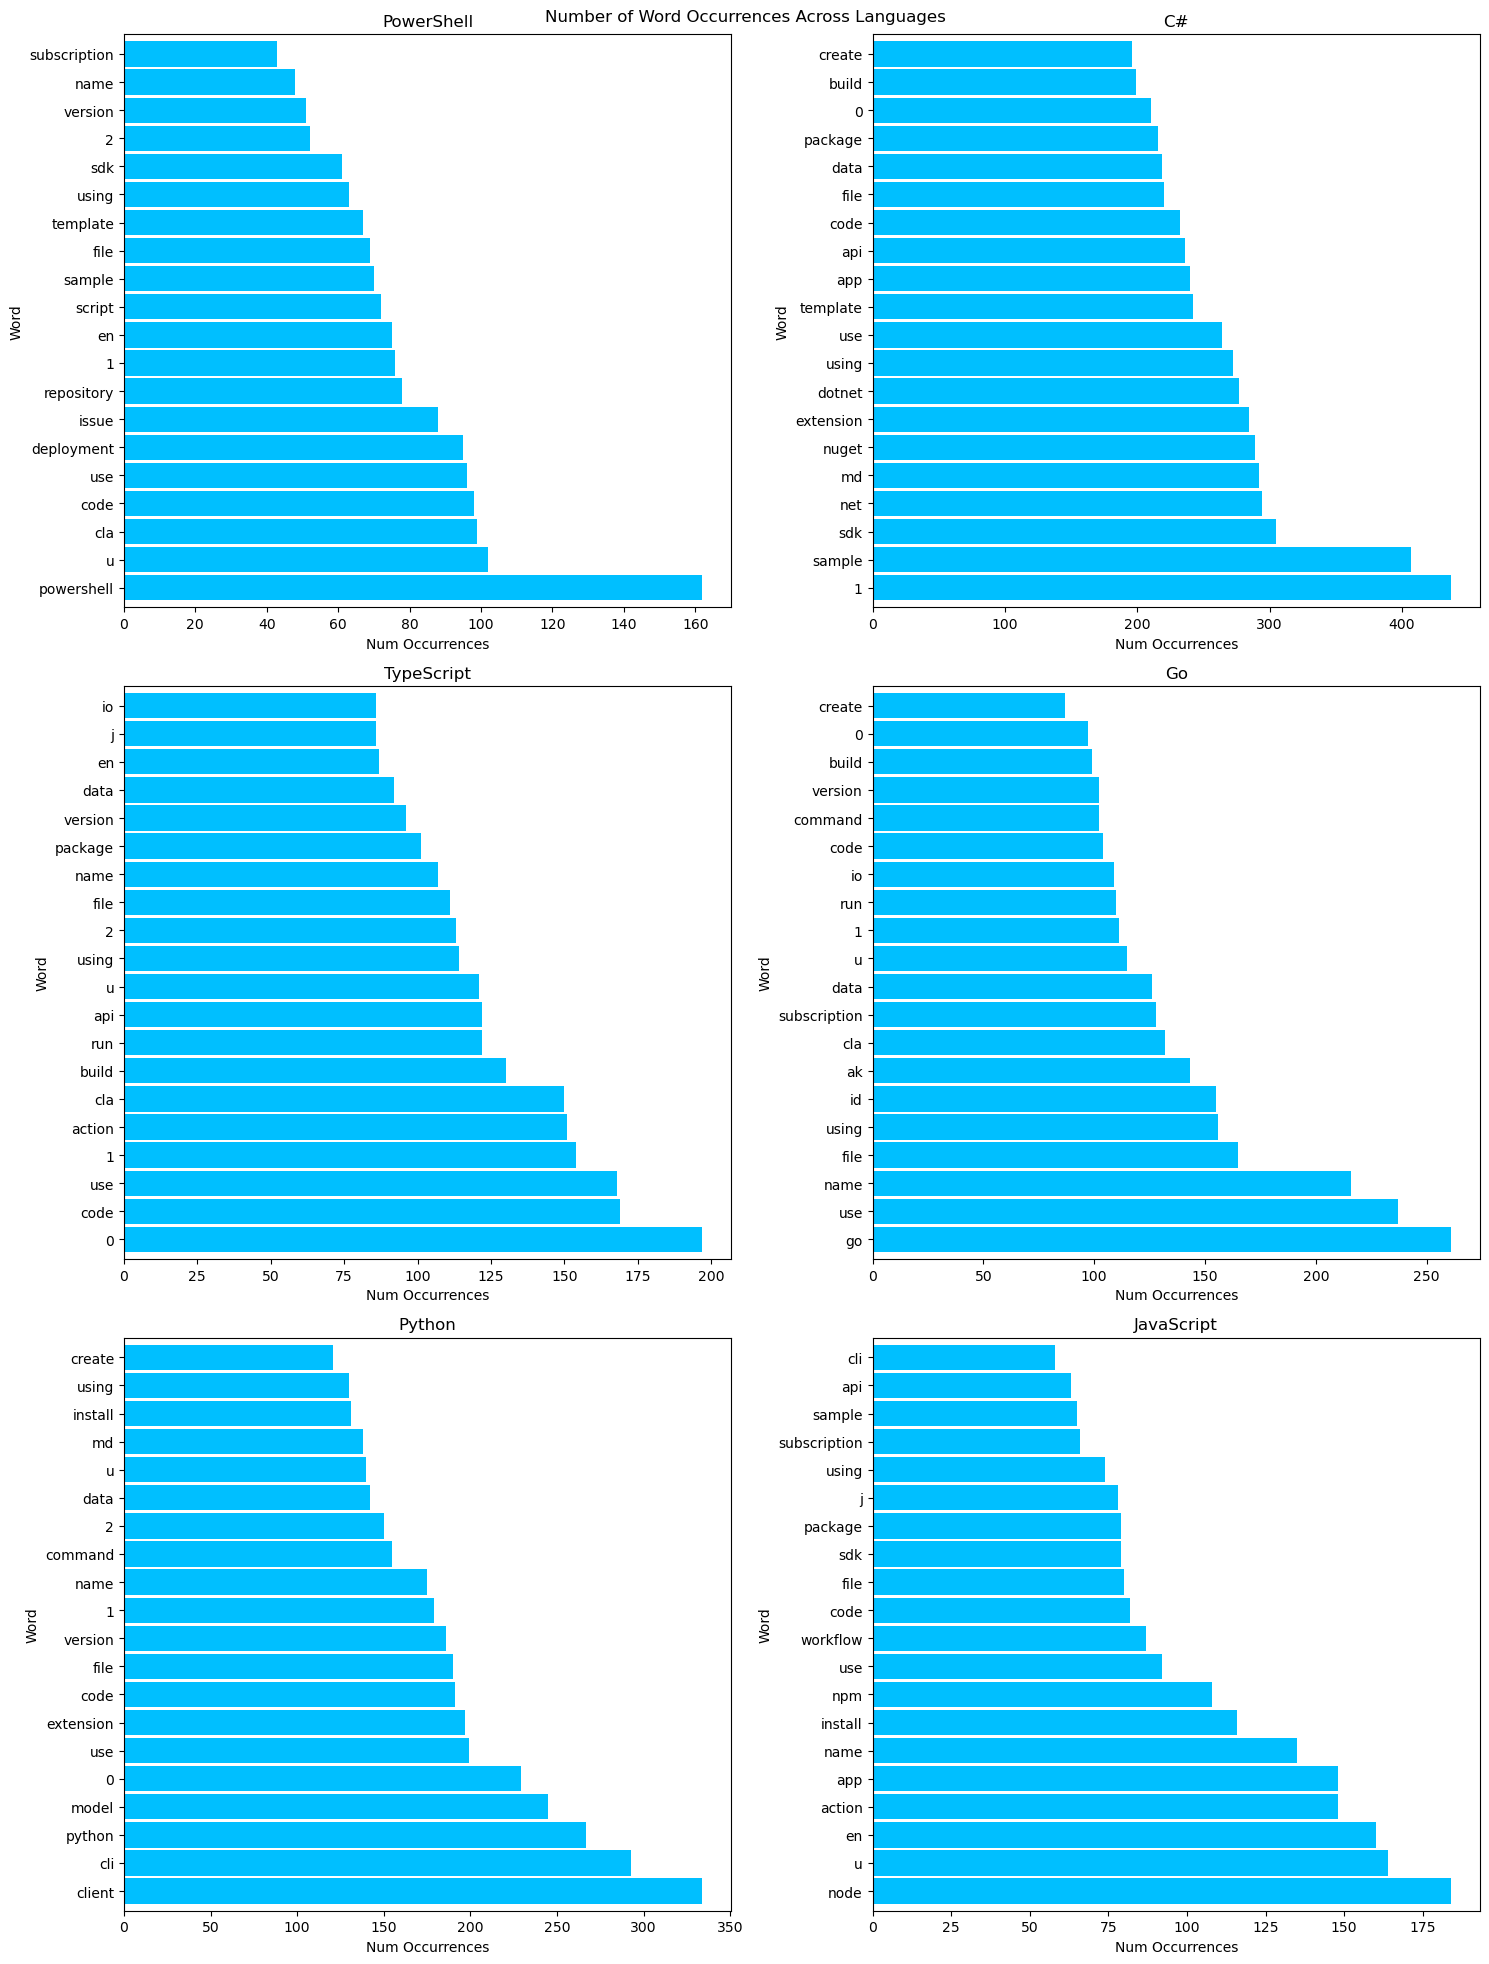

In [10]:
# Get visualizations for word frequency across languages

functions.visualize_repos(train)

#### Charting Observations: 'FILL'
* 

####  Statistics: 'FILL'


##### Hypothesis: 'FILL'
$H_0$ : 'FILL' is independent of 'FILL'<br>
$H_a$ : 'FILL' is not independent of 'FILL'

In [11]:
# Running stat test


#### Result
* Based on the result of our test, we can infer that 

### 2. QUESTION?

In [12]:
# Get visualizaions


#### Charting Observations: 'FILL'

* Higher fluctuation or spread of volatile acidity results in a lower wine quality grade.
* Conversely, lower fluctuation or spread of volatile acidity results in a higher wine quality grade.

#### Result
* Based on the results of our test, we can infer that 

### 3. QUESTION?

In [13]:
# Get visualizaions


#### Charting Observations: 'FILL'
* There is a 

#### Result
* Based on the observation in the chart and the supporting evidence 

### 4. QUESTION?

In [14]:
# Get visualizaions


#### Chart Observations: 'FILL'
* 

#### Result
* Based on our test result, we can infer 

#### Charting Observations: `FILL`
* no clearly observable/useful clusters

## Exploration Summary
* 

### Features we are moving to modeling with
* 
* **'FILL': is our target variable**

### Features not moving to modeling 


## Modeling

### Introduction
* Primary evaluation metric will be **Accuracy**
    * There is no greater value in false positives or false negatives


#### Baseline 

In [15]:
# get baseline 

len(train[train.language == 'C#'])/len(train)

0.2260536398467433

#### The baseline to be is 22.61%

### Model Selection

* Dataset was processed two different ways for sending into model, across three different models.
    * Processed via Count Vectorization and TF-IDF
    * Models explored: Decision Tree, Random Forest, Multinomial Naive Bayes
    * Number of variations explored: 6
* For Decision Tree and Random Forest, hyperparameters were adjust to find best fit.
* We saw that including bigrams was actually harmful to model performance. This report will not display those results.
* All Models have similar results.
    * All out performed the baseline accuracy of 22.61%
    * Multinomial Naive Bayes gave the best results on the train and validate sets
* We will use the Multinomial Naive Bayes model for the unseen Test data.

In [16]:
#Split data into features and target

X_train = train.readme_contents
y_train = train.language
X_validate = validate.readme_contents
y_validate = validate.language
X_test = test.readme_contents
y_test = test.language

In [17]:
#Vectorize our text

cv = CountVectorizer()
tfidf = TfidfVectorizer()

X_count_train = cv.fit_transform(X_train)
X_count_validate = cv.transform(X_validate)
X_count_test = cv.transform(X_test)

X_tf_train = tfidf.fit_transform(X_train)
X_tf_validate = tfidf.transform(X_validate)
X_tf_test = tfidf.transform(X_test)

### Count with Decision Tree

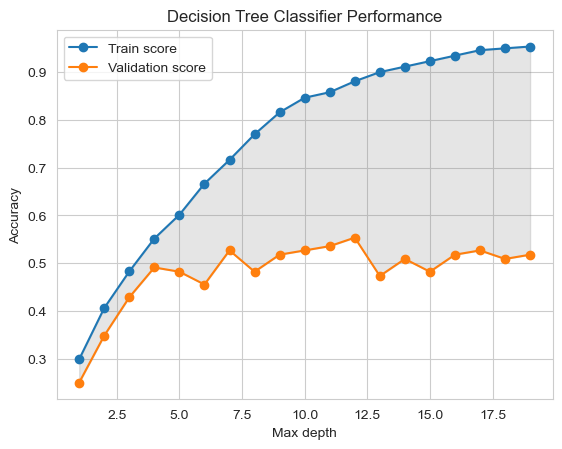

,max_depth,train_acc,val_acc,score_diff
0,1,0.298851,0.250000,0.048851
1,2,0.406130,0.348214,0.057916
2,3,0.482759,0.428571,0.054187
3,4,0.551724,0.491071,0.060653
4,5,0.601533,0.482143,0.119390
5,6,0.666667,0.455357,0.211310
6,7,0.716475,0.526786,0.189689
7,8,0.770115,0.482143,0.287972
8,9,0.816092,0.517857,0.298235
9,10,0.846743,0.526786,0.319958


In [18]:
functions.decision_tree(X_count_train, X_count_validate, y_train, y_validate)

### TF-IDF with Random Forest

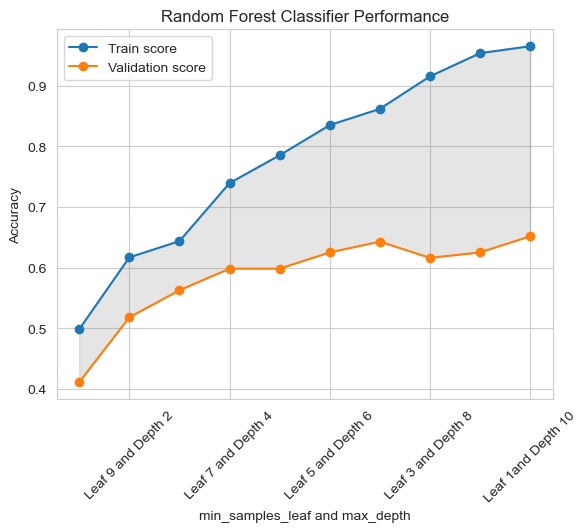

,min_samples_leaf,max_depth,train_score,validate_score,diff_score
0,1,10,0.965517,0.651786,0.313732
1,2,9,0.954023,0.625000,0.329023
2,3,8,0.915709,0.616071,0.299637
3,4,7,0.862069,0.642857,0.219212
4,5,6,0.835249,0.625000,0.210249
5,6,5,0.785441,0.598214,0.187226
6,7,4,0.739464,0.598214,0.141249
7,8,3,0.643678,0.562500,0.081178
8,9,2,0.616858,0.517857,0.099001
9,10,1,0.498084,0.410714,0.087370


In [19]:
functions.random_forest_scores(X_tf_train, y_train, X_tf_validate, y_validate)

### TF-IDF with Naive Bayes

In [41]:
#Use and fit using Naive Bayes

mnb = MultinomialNB(alpha=1)

mnb.fit(X_tf_train, y_train)
mnb.score(X_tf_train, y_train)

0.6628352490421456

In [42]:
mnb.score(X_tf_validate, y_validate)

0.5982142857142857

### Test Model: TF-IDF with Naive Bayes


In [43]:
#Run Naive Bayes on unseen data

X_test_bow = tfidf.transform(X_test)
mnb.score(X_test_bow, y_test)

0.5531914893617021

### Modeling Wrap 
* On the test set, the model returned an 'FILL' score of 'FILL'
    * 'FILL' the baseline 
    * Also outperformed the models training and validation runs
* We can reasonably presume that the model will perform consistantly in the same range
* This model **'FILL'** be used in production

## Conclusion

### Summary
* The four features we evaluated closely: 
* Only 
* 
* Our best model was 'FILL' 
    
### Recommendations
* The model provided can be used to 'FILL'

### Next Steps
* If provided more time to work on the project we would want to explore 'FILL'